In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
inflow_data = pd.read_csv("inflow_data.csv")
outflow_data = pd.read_csv("outflow_data.csv")
position_data = pd.read_csv("position_files_data.csv")

In [3]:
# 13 pharmaceutical companies in the data
pharma_13 = ["Eli Lilly and Co", 
             "Roche Holding AG", 
             "Abbott Laboratories", 
             "Bayer AG", 
             "Merck & Co.\\, Inc.", 
             "Novartis AG", 
             "Pfizer Inc", 
             "Johnson & Johnson", 
             "GlaxoSmithKline PLC", 
             "AstraZeneca PLC", 
             "Biogen Inc", 
             "Regeneron Pharmaceuticals Inc",
             "Moderna Therapeutics\\, Inc."]

# relabel pharmaceutical companies
company_labels = [
           "eli_lilly", 
           "roche", 
           "abbott_labs", 
           "bayer", 
           "merck", 
           "novartis", 
           "pfizer", 
           "johnson_johnson", 
           "glaxo_smith_kline", 
           "astra_zeneca", 
           "biogen", 
           "regeneron", 
           "moderna"]

# filter position data for those employed in the United States as of November 2019
position_data_filtered = position_data.\
    loc[position_data.company.isin(pharma_13) & 
        (position_data['enddate'] > "2019-11-01") & 
        (position_data['country'] == "United States")]

# conditions to reassign company variable with new labels
company_conditions_position = [
    (position_data_filtered["company"] == "Eli Lilly and Co"),
    (position_data_filtered["company"] == "Roche Holding AG"),
    (position_data_filtered["company"] == "Abbott Laboratories"),
    (position_data_filtered["company"] == "Bayer AG"),
    (position_data_filtered["company"] == "Merck & Co.\\, Inc."),
    (position_data_filtered["company"] == "Novartis AG"),
    (position_data_filtered["company"] == "Pfizer Inc"),
    (position_data_filtered["company"] == "Johnson & Johnson"),
    (position_data_filtered["company"] == "GlaxoSmithKline PLC"),
    (position_data_filtered["company"] == "AstraZeneca PLC"),
    (position_data_filtered["company"] == "Biogen Inc"),
    (position_data_filtered["company"] == "Regeneron Pharmaceuticals Inc"),
    (position_data_filtered["company"] == "Moderna Therapeutics\\, Inc.")]

# assign new company labels
position_stock = position_data_filtered.\
    assign(company_reassign = np.select(company_conditions_position, company_labels)).\
    groupby(["company_reassign"]).size().reset_index(name = "pre_stock").\
    rename(columns = {'company_reassign': 'company'})

# select only two columns: company and stock as of Nov 2019; sort in ascending order
stock_flow_1 = position_stock[['company', 'pre_stock']].\
    sort_values(['company'], ascending = [True])
 
# rename variable
stock_flow_1['net_flow'] = stock_flow_1['pre_stock']

In [4]:
# change date variable to month-year format
inflow_data['month_year'] = pd.to_datetime(inflow_data['month']).dt.to_period('M')
outflow_data['month_year'] = pd.to_datetime(outflow_data['month']).dt.to_period('M')

# filter inflow data to those in United States after November 2019
inflow_data_filtered = inflow_data.\
    loc[inflow_data.new_company.isin(pharma_13) & 
    (inflow_data['prev_country'] == "United States") & 
    (inflow_data['new_country'] == "United States") &
    (inflow_data['month_year'] >= '2019-11')]

# filter outflow data to those in United States after November 2019
outflow_data_filtered = outflow_data.\
    loc[outflow_data.prev_company.isin(pharma_13) & 
    (outflow_data['prev_country'] == "United States") & 
    (outflow_data['new_country'] == "United States") &
    (outflow_data['month_year'] >= '2019-11')]

# rename month variable to "date"
inflow_data_filtered = inflow_data_filtered.rename(columns = {'month': 'date'})
outflow_data_filtered = outflow_data_filtered.rename(columns = {'month': 'date'})

# create salary bump variable or the differential paid to switchers
inflow_data_filtered = inflow_data_filtered.\
    assign(pay_bump_in = inflow_data_filtered['new_salary'] - inflow_data_filtered['prev_salary'])
outflow_data_filtered = outflow_data_filtered.\
    assign(pay_bump_out = outflow_data_filtered['new_salary'] - outflow_data_filtered['prev_salary'])

# conditions for creating company variable to merge on
company_conditions_inflow = [
    (inflow_data_filtered["new_company"] == "Eli Lilly and Co"),
    (inflow_data_filtered["new_company"] == "Roche Holding AG"),
    (inflow_data_filtered["new_company"] == "Abbott Laboratories"),
    (inflow_data_filtered["new_company"] == "Bayer AG"),
    (inflow_data_filtered["new_company"] == "Merck & Co.\\, Inc."),
    (inflow_data_filtered["new_company"] == "Novartis AG"),
    (inflow_data_filtered["new_company"] == "Pfizer Inc"),
    (inflow_data_filtered["new_company"] == "Johnson & Johnson"),
    (inflow_data_filtered["new_company"] == "GlaxoSmithKline PLC"),
    (inflow_data_filtered["new_company"] == "AstraZeneca PLC"),
    (inflow_data_filtered["new_company"] == "Biogen Inc"),
    (inflow_data_filtered["new_company"] == "Regeneron Pharmaceuticals Inc"),
    (inflow_data_filtered["new_company"] == "Moderna Therapeutics\\, Inc.")]
company_conditions_outflow = [
    (outflow_data_filtered["prev_company"] == "Eli Lilly and Co"),
    (outflow_data_filtered["prev_company"] == "Roche Holding AG"),
    (outflow_data_filtered["prev_company"] == "Abbott Laboratories"),
    (outflow_data_filtered["prev_company"] == "Bayer AG"),
    (outflow_data_filtered["prev_company"] == "Merck & Co.\\, Inc."),
    (outflow_data_filtered["prev_company"] == "Novartis AG"),
    (outflow_data_filtered["prev_company"] == "Pfizer Inc"),
    (outflow_data_filtered["prev_company"] == "Johnson & Johnson"),
    (outflow_data_filtered["prev_company"] == "GlaxoSmithKline PLC"),
    (outflow_data_filtered["prev_company"] == "AstraZeneca PLC"),
    (outflow_data_filtered["prev_company"] == "Biogen Inc"),
    (outflow_data_filtered["prev_company"] == "Regeneron Pharmaceuticals Inc"),
    (outflow_data_filtered["prev_company"] == "Moderna Therapeutics\\, Inc.")]

# create compay variable for merge
inflow_data_filtered = inflow_data_filtered.assign(company = np.select(company_conditions_inflow, company_labels))
outflow_data_filtered = outflow_data_filtered.assign(company = np.select(company_conditions_outflow, company_labels))

# filter for only company and month-year
inflow_data_filtered_subsetted = inflow_data_filtered[["company", "month_year"]]
outflow_data_filtered_subsetted = outflow_data_filtered[["company", "month_year"]]

# count inflow and outflow for each company, by month-year
inflow_monthly = inflow_data_filtered_subsetted.\
    groupby(["company", "month_year"]).\
    size().\
    reset_index(name = "inflow")
outflow_monthly = outflow_data_filtered_subsetted.\
    groupby(["company", "month_year"]).\
    size().\
    reset_index(name = "outflow")

# combined inflows and outflows by month-year
all_flows_monthly = pd.merge(inflow_monthly, outflow_monthly, on = ["month_year", "company"], how = 'outer', indicator = True)

# remove NA's from merged data
all_flows_monthly['inflow_adj'] = all_flows_monthly['inflow'].fillna(0)
all_flows_monthly['outflow_adj'] = all_flows_monthly['outflow'].fillna(0)

# calculate a net-flow variables, or inflow minus outflow for each company, by month-year
all_flows_monthly = all_flows_monthly.\
    assign(net_flow = all_flows_monthly['inflow_adj'] - all_flows_monthly['outflow_adj']).\
    sort_values(['company', 'month_year'], ascending = [True, True])

# select subset of columns
net_flows_monthly = all_flows_monthly[["company", "month_year", "net_flow"]]

In [5]:
# select only company and pre-stock variables for base to calculate growth rates
position_stock_subset = position_stock[['company', 'pre_stock']]

stock_flow_2 = pd.merge(net_flows_monthly, position_stock_subset, on = ["company"], how = 'left')

stock_flow_2 = stock_flow_2[["company", "month_year", "pre_stock", "net_flow"]]

In [6]:
stock_flow_merged = pd.concat([stock_flow_1, stock_flow_2])
    
stock_flow_merged['month_year'] = stock_flow_merged['month_year'].fillna('2019-10')
    
stock_flow = stock_flow_merged.\
    assign(cumulative_employment = stock_flow_merged.\
           groupby(['company'])["net_flow"].\
           cumsum())

stock_flow = stock_flow.\
    assign(cumulative_growth = (stock_flow.cumulative_employment/stock_flow.pre_stock)-1).\
    sort_values(['company', 'month_year'], ascending = [True, True])

# Revelio Labs Newsletter
## Unpacking employment trends in the Pharmaceutical space
In a previous post, we discussed the characteristics of jobs that are correlated with employee satisfaction, and which sectors currently provide the most meaningful work. In this newsletter, we will use some of the insights from this work to better understand trends that exist in the pharmaceutical industry.

The graph below sketches out cumulative growth in employment across 13 pharmaceutical companies in the United States from November 2019 through June 2021. From November 2019 through March 2020, the cumulative growth in employment is essentially 0%, however, once the World Health Organization declared COVID-19 a global pandemic in March 2020, employment increased across all 13 firms. The average growth rate from April 2020, through June 2021, was 14%, but for some firms it was singificantly more. Biogen Inc. and Moderna Therapeutics Inc. experienced growth rates of 28% and 42%, respectively. 

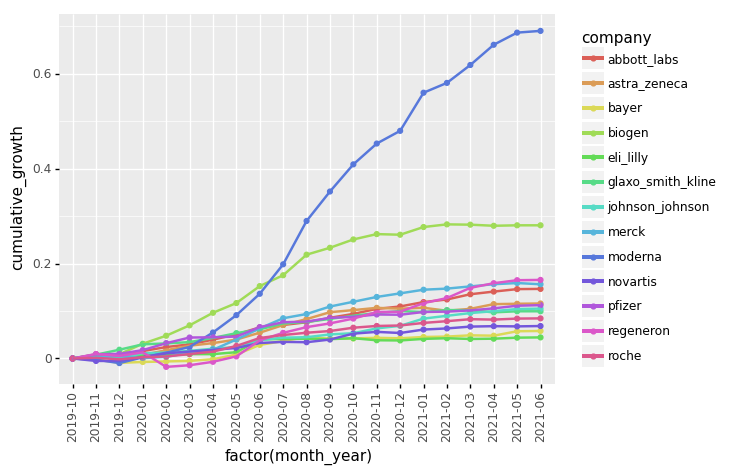

<ggplot: (335526354)>

In [7]:
from plotnine import ggplot, aes, geom_point, geom_line, theme, element_text, element_line

(ggplot()
    + geom_point(stock_flow, aes('factor(month_year)', 'cumulative_growth', color = 'company'))
    + geom_line(stock_flow, aes('factor(month_year)', 'cumulative_growth', color = 'company', group = 'company'), size = 1)
    + theme(axis_text_x = element_text(angle = 90)))

To provide some context to these growth numbers, the chart below shows the total employment for each of the pharmaceutical companies prior to the pandemic. Biogen and Moderna were two of the smaller companies in the sample, as measured by total employees. Small companies have the potential to grow a lot faster, especially when they are successful. Moderna was one of four pharmaceutical companies to bring a vaccine to market, and one of two to bring an mRNA vaccine. The mRNA vaccine is a promising technology that may revolutionize future vaccines, and treatments for cancer and infectious disease. This breakthrough, combined with their smaller status, is likely what propelled their growth rate to the top of the group, at least on the demand side.

Text(0.5, 1.0, 'Total Employment Pre-Covid')

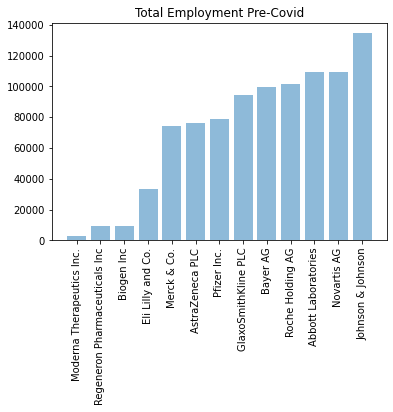

In [8]:
pharma_13_labels = ["Abbott Laboratories",
                    "AstraZeneca PLC",
                    "Bayer AG",
                    "Biogen Inc",
                    "Eli Lilly and Co.",
                    "GlaxoSmithKline PLC",
                    "Johnson & Johnson",
                    "Merck & Co.",
                    "Moderna Therapeutics Inc.",
                    "Novartis AG",
                    "Pfizer Inc.",
                    "Regeneron Pharmaceuticals Inc",
                    "Roche Holding AG"]

pharma_13_employment = [109000, 76100, 99400, 9100, 33600, 94100, 134500, 74000, 2500, 109000, 78500, 9000, 101500]


data_employment = pd.DataFrame([pharma_13_labels, pharma_13_employment]).T
#data_T = total_employment_data.T

bar_data = data_employment.\
    rename(columns = {0: 'company'}).\
    rename(columns = {1: "employment"}).\
    sort_values(['employment'], ascending = [True])

x = bar_data['company']
y = bar_data['employment']
#y_pos = np.arange(len(x))

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, rotation = 90)
plt.ylabel('')
plt.title('Total Employment Pre-Covid')


#bar_data.plot.bar(x = 'company', y = 'employment', rot = 0)


In a previous newsletter (cite newsletter), we discussed worker satisfaction and made and important discovery that has some relevance to this employment trend: job satisfaction is positively correlated with industries that were essential to providing solutions to the pandemic. This discovery poses an alternative mechanism to this surge in employment: an increase in supply of labor in pharmaceuticals due to increased satisfaction induced by the pandemic. 

A static supply and demand model would not be able to predict the new equilibrium wage - increased demand for labor induced by the pressure to produce a vaccine would increase wages, but the increase in supply of labor due to greater satisfaction in the space induced by the pandemic would decrease wages - but using Revelio Labs data, we can shed some light on which of these mechanisms may have had a greater impact. 

The following chart shows salary differentials offered by the 13 pharmceutical firms over the period.

In [9]:
import math

inflow_data_salary_bump = inflow_data_filtered.\
    assign(salary_bump = inflow_data_filtered.new_salary - inflow_data_filtered.prev_salary)

poaching_data = inflow_data_salary_bump[['company', 'salary_bump']]

poaching_count = poaching_data.\
    groupby(["company"]).\
    size().\
    reset_index(name = "n")
    

poaching_mean_bump = poaching_data.\
    groupby(["company"]).\
    mean('salary_bump').\
    reset_index().\
    rename(columns = {'salary_bump': 'mean_bump'})

poaching_std_dev = poaching_data.\
    groupby(["company"]).\
    std().\
    reset_index().\
    rename(columns = {'salary_bump': 'std_dev'})
   
    
poaching_data_all_1 = pd.merge(poaching_count, poaching_mean_bump, on = ["company"], how = 'left')
poaching_data_all_2 = pd.merge(poaching_data_all_1, poaching_std_dev, on = ["company"], how = 'left')
poaching_data_all_2['n'] = poaching_data_all_2['n'].astype(float)
poaching_data_all_3 = poaching_data_all_2.assign(std_error = poaching_data_all_2.std_dev/(poaching_data_all_2.n**(1/2)))

Text(0.5, 1.0, 'Salary differentials offered to switchers November 2019 to June 2021')

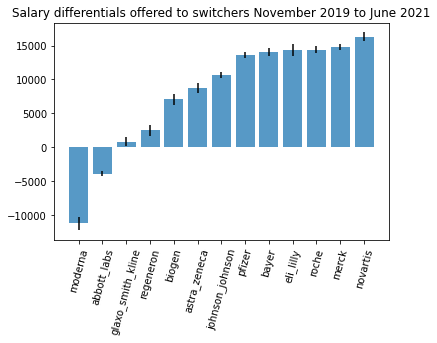

In [10]:
bar_data_2 = poaching_data_all_3.\
    sort_values(['mean_bump'], ascending = [True])

x = bar_data_2['company']
y = bar_data_2['mean_bump']
y_pos = np.arange(len(x))
error = bar_data_2['std_error']

plt.bar(x, y, yerr= error, align = 'center', alpha = 0.75)
plt.xticks(x, rotation = 75)
plt.ylabel('')
plt.title('Salary differentials offered to switchers November 2019 to June 2021')

In general, it appears the demand for labor exceeded the supply as players across the space were paying up to poach talent away from other firms. However, there are two interesting anecodotes from this table: Moderna Therapeutics Inc. and Abbott Laboratories. Neither of these firms were shelling out the dough to attract talent. Instead, both of these firms were able to recruit people for less money. Abbott was paying their new hires 4,000 dollars less, on average, and Moderna was paying their new hires 11,000 dollars less, on average. This evidence suggests these firms may offer positive employment differentials along other margins, such as culter and values, career opportunities, leadership, or work-life balance, in order to compensate for the lower salary-offering.

### Key takeaways:

1. Two mechanisms likely lead to the surge in employment within the pharmaceutical space: 1) increased demand for labor to produce a vaccine; and 2) increased supply of labor as people pursued more meaningful work.

2. Some firms were able to attract talent without paying a premium, which suggests these firms rate well along worker satisfaction dimensions other than compensation.

3. Smaller firms may compete with larger firms along non-monetary dimensions